In [264]:
import pandas as pd
import numpy as np
import random 


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

## **********READING DATA********************

Here we read the data:
Data consist of an (i) index, (ii) tittle , (iii) text and (iv) label (FAKE or REAL)

In [2]:
#UPOAD DATA
df = pd.read_csv("fake_or_real_news.csv" )
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


## **********Create Bag of Words********************



## Here we use the CountVectorizer infrastructure  to create a word counter in each text

## We then split the bag of words in a training and testing set

In [22]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Print the head of df
#print(df.head())

# Create a series to store the labels: y
y = df.label

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.33, random_state=53)

# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

print("***SOME VOCABULARY WORDS")
print('')
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[0:10])
print(count_vectorizer.get_feature_names()[44950:44960])

***SOME VOCABULARY WORDS

[u'00', u'000', u'0000', u'00000031', u'000035', u'00006', u'0001', u'0001pt', u'000ft', u'000km']
[u'scripts', u'scriptural', u'scripture', u'scriptures', u'scriptworthy', u'scroll', u'scrolled', u'scrolling', u'scrolls', u'scrub']


In [327]:
print count_train.A[:5]

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## **********Create TF-IDF (Term Frequency - INVERSE DOCUMENT FREQUENCY)********************

## Here we use the TfidfVectorizer to create the weights of each word from our vocabulary

## the formula for word i in text j is:


wi,j = Tf i,j * log(N/mi)

In [328]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[5000:5010])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])

[u'auctioning', u'auctions', u'audacious', u'audaciousness', u'audacity', u'audible', u'audibly', u'audience', u'audiences', u'audio']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## *********Naive Bayesian Model : Ideal for sparse matrices********************

## Let's Word of Bags and TF-IDF methods : Spoiler they both do Well

0.893352462936394


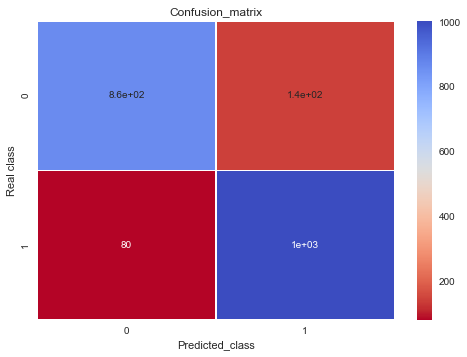


----------Classification Report------------------------------------
             precision    recall  f1-score   support

       FAKE       0.92      0.86      0.89      1008
       REAL       0.88      0.93      0.90      1083

avg / total       0.89      0.89      0.89      2091



In [266]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier_count = MultinomialNB()

# Fit the classifier to the training data
nb_classifier_count.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier_count.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm

cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])


sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,pred))

## NOT BAD !!!!!!

0.8565279770444764


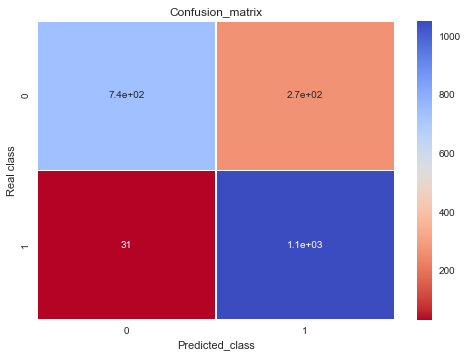


----------Classification Report------------------------------------
             precision    recall  f1-score   support

       FAKE       0.96      0.73      0.83      1008
       REAL       0.80      0.97      0.88      1083

avg / total       0.88      0.86      0.85      2091



In [265]:

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier_tf = MultinomialNB()

# Fit the classifier to the training data
nb_classifier_tf.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier_tf.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test,pred)
print(score)

# Calculate the confusion matrix: cm
cm = metrics.confusion_matrix(y_test,pred,labels=['FAKE','REAL'])


sns.heatmap(cm,cmap="coolwarm_r",annot=True,linewidths=0.5)
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,pred))

## NOT BAD !!!!!!

### Let's Hypertune the initial conditional probability in our Naive Bayesian Model

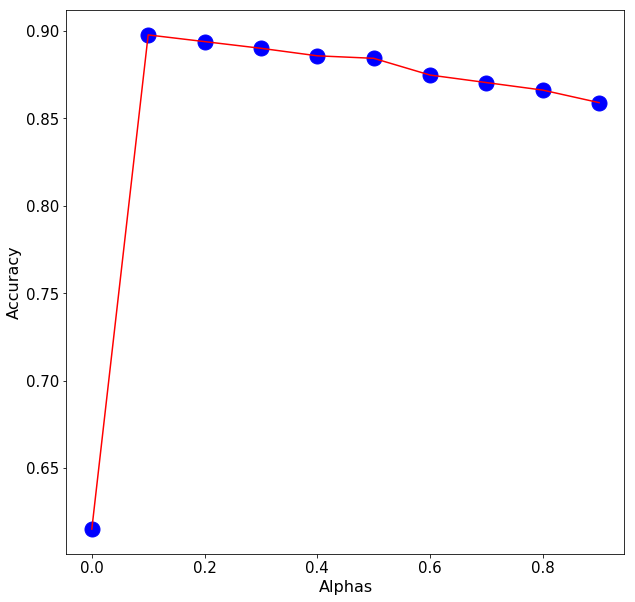

In [257]:
# Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
scores =[]
for alpha in alphas:
    #print('Alpha: ', alpha)
    #print('Score: ', train_and_predict(alpha))
    #print('')
    scores.append([alpha,train_and_predict(alpha)])
scores = np.array(scores)


ax = plt.figure(figsize=(10,10))
plt.plot(scores[:,0],scores[:,1],"bo",markersize=15)
plt.plot(scores[:,0],scores[:,1],"r-")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel("Alphas",fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

## WE can look in the features after  TF-IDF vectorization

In [225]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names()

# Zip the feature names together with the coefficient array and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.coef_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:10])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[20:25])

('FAKE', [(-11.316312804238807, u'0000'), (-11.316312804238807, u'000035'), (-11.316312804238807, u'0001'), (-11.316312804238807, u'0001pt'), (-11.316312804238807, u'000km'), (-11.316312804238807, u'0011'), (-11.316312804238807, u'006s'), (-11.316312804238807, u'007'), (-11.316312804238807, u'007s'), (-11.316312804238807, u'008s')])
('REAL', [(-11.316312804238807, u'02welcome'), (-11.316312804238807, u'031'), (-11.316312804238807, u'032'), (-11.316312804238807, u'0325'), (-11.316312804238807, u'033')])


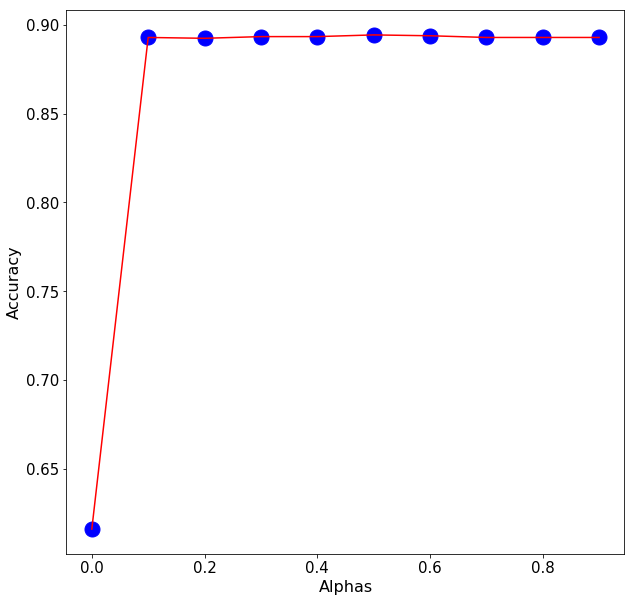

In [259]:
#Create the list of alphas: alphas
alphas = np.arange(0,1,0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(count_train,y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(count_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test,pred)
    return score

# Iterate over the alphas and print the corresponding score
scores =[]
for alpha in alphas:
    #print('Alpha: ', alpha)
    #print('Score: ', train_and_predict(alpha))
    #print('')
    scores.append([alpha,train_and_predict(alpha)])
scores = np.array(scores)


ax = plt.figure(figsize=(10,10))
plt.plot(scores[:,0],scores[:,1],"bo",markersize=15)
plt.plot(scores[:,0],scores[:,1],"r-")
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)
plt.xlabel("Alphas",fontsize=16)
plt.ylabel('Accuracy',fontsize=16)


## **********CHATBOT INFRASTRUCTURE********************

## ********** HERE WE BUILD CHATBOT INFRASTRUCTURE********************

##### Our Chatbot is a news supplier : it can chat to some extend both is build to provide fake/real news

### Chatbot has 3 states and it will tog between states : echo, news provider (workhorse) and chichat

In [33]:
#Rasa Module
from rasa_nlu.converters import load_data
from rasa_nlu.config import RasaNLUConfig
from rasa_nlu.model import Trainer
import json

training_data = load_data('training.json')


## **********Interpreter training : We can identify the intent of the user**********

## We rely on the RASA module that uses spacy NLP prowess to learn from training data to identify the needs of the user

In [34]:
pipeline = [
    "nlp_spacy",
    "tokenizer_spacy",
    "ner_crf"
]



args = {'pipeline':'spacy_sklearn'}


# Create a config that uses this pipeline
#config = RasaNLUConfig(cmdline_args={'pipeline':pipeline})
config = RasaNLUConfig(cmdline_args=args)

# Create a trainer that uses this config
trainer = Trainer(config)

# Create an interpreter by training the model
interpreter = trainer.train(training_data)
entities = interpreter.parse(unicode("yes give me fake",'UTF-8'))
entities['intent']

Fitting 2 folds for each of 6 candidates, totalling 12 fits


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


{u'confidence': 0.29577367747281247, u'name': u'fake news'}

## Let's find a channel to the SQL Database so the ChatBot can access it


## We use a SQLITE to connect to database so chatbot can dig some news

In [35]:
import sqlite3

In [36]:
conn = sqlite3.connect('yourfile.sqlite')

In [168]:
# Create a cursor
c = conn.cursor()

# Define area and price
#area, price = "south", "hi"
#t = (area, price)

# Execute the query
c.execute('SELECT title FROM yourfile where label="FAKE"')



## ********** NEWS CHATBOT INFRASTRUCTURE********************

## This BOT component takes care of the News deployment

## It connects to the database to look for the news
## Example:
## USER : I want fake news
## BOT : Ok some fake news for you
## TRUMPED! LIBERAL NEWS OUTLET BLOOMBERG POLL CONCEDES TRUMP BEATING CROOKED HILLARY IN FLORIDA

In [314]:
# Define respond()



def find_news(news_type):

    r_news_txt = []
    r_news_title = []
    if news_type =="fake news":
        c.execute('SELECT text FROM yourfile')
        news_txt = c.fetchall();
        
        c.execute('SELECT title FROM yourfile')
        news_title = c.fetchall();
        
    if news_type =="real news":
        c.execute('SELECT text FROM yourfile')
        news_txt = c.fetchall();
        
        c.execute('SELECT title FROM yourfile')
        news_title = c.fetchall();

    
    for _ in news_txt:
         new_t = _[0].encode('ascii','replace')
         r_news_txt.append(new_t);
        
    for _ in news_title:
         new_t = _[0].encode('ascii','replace')
         r_news_title.append(new_t);
    
    r_news_title = np.random.choice(r_news_title,4)
    r_news_txt = np.random.choice(r_news_txt,4)
    
    response_news_txt =[]
    response_news_title =[]
    tr = tfidf_vectorizer.transform(r_news_txt)
    labels = nb_classifier.predict(tr)
    #print(labels)
    if news_type == "fake news":
        news_type_sgn = "FAKE" 
    else:
        news_type_sgn = "REAL"
    for idx,_l in enumerate(labels):
        if _l == news_type_sgn:
           
            response_news_txt.append(r_news_txt[idx])
            response_news_title.append(r_news_title[idx])
    
    return response_news_txt,response_news_title


def respond_inform(message):
    # Extract the entities
    u_msg =unicode(message,'UTF-8')
    intent = interpreter.parse(u_msg)["intent"]['name']
    
    if  "news" in intent:
        titles,news = find_news(intent)
        return titles,news

    

## CHICHAT CHATBOT INFRASTRUCTURE**


## it deals with Questions and statements
## Example
## USER : thanks , bye!
## BOT : good bye, dude

In [271]:
import random

bot_template = "BOT : {0}"
user_template = "USER : {0}"

# Define a function that sends a message to the bot: send_message
def chichat_send_message(message):
    # Print user_template including the user_message
    print(user_template.format(message))
    # Get the bot's response to the message
    response = chichat_respond(message)
    # Print the bot template including the bot's response.
    print(bot_template.format(response))
    
    
    




responses = {'question': ["I don't know :(. Want some news?", 'you tell me! want some news?'],
            'statement':['bye','good bye, dude']}

def chichat_respond(message):
    # Check for a question mark
    if message.endswith('?'):
        # Return a random question
        return random.choice(responses["question"])
    # Return a random statement
    else:
        return random.choice(responses["statement"])
    

# Send a message to the bot



## Echo BOT : 

## Example : 
## USER : hi
## BOT : I can hear you! You said: hi

In [267]:
bot_template = "BOT : {0}"
user_template = "USER : {0}"

# Define a function that responds to a user's message: respond
def echo_respond(message):
    # Concatenate the user's message to the end of a standard bot respone
    bot_message = "I can hear you! You said: " + message
    # Return the result
    return bot_message
def echo_send_message(message):
    # Print user_template including the user_message
    print(user_template.format(message))
    # Get the bot's response to the message
    response = echo_respond(message)
    # Print the bot template including the bot's response.
    print(bot_template.format(response))



In [326]:
STATE =0
STATES=['affirm','fake news','real news','goodbye']
# Define send_messages()
def send_messages(messages):
    state = STATE
    pending = None
    for msg in messages:
        u_msg =unicode(msg,'UTF-8')
        intent = interpreter.parse(u_msg)["intent"]['name']
       
        if intent == STATES[0]:
            echo_send_message(msg)
        if intent == STATES[1] or intent == STATES[2]:
            print(user_template.format(msg))
            print(bot_template.format('Ok some ' + intent + ' for you'))
            
            news,titles = respond_inform(msg);
            for idx,_news in enumerate(news[:1]):
                
                print(_news)
        if intent ==STATES[3] :
            chichat_send_message(msg);
# Send the messages
send_messages([
    "hi",
    "I want fake news",
    "give me real news",
    "thanks , bye!"
])



USER : hi
BOT : I can hear you! You said: hi
USER : I want fake news
BOT : Ok some fake news for you
November 3, 2016 - Fort Russ News -  RusVesna - translated by J. Arnoldski -  


On October 27th, 2016, as a result of joint operative-investigative activities between Russian and Turkish intelligence, in Instanbul were arrested leaders and active participants of an underground gang from the North Caucasus region and Crimea, who were hiding from Russian law enforcement on Turkish territory.  
During the course of the operation, representatives of the Crimean branch of Hizb -ut-Tahrir and the North Caucasus wing of ISIS, totaling 80 people, were arrested. 


In line with the agreement with Turkey?s intelligence services, their extradition to Russia is being resolved. 

A high-ranking source in security structures explained to Russian Spring that Turkish intelligence services? transfer of information on the Crimean Tatar and North Caucasus terrorist network to the Russian side, timed for 